In [1]:
import os
os.getcwd()

'/home/matthew/anaconda3/envs/insight/staycationLA/notebooks'

In [2]:
#modified from 
#https://towardsdatascience.com/topic-modeling-quora-questions-with-lda-nmf-aff8dce5e1dd
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [3]:
#pip install plotly

In [2]:
# Import packages

import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
import seaborn as sns

In [ ]:
reviews = pd.read_csv("../data/processed/LA_combined_reviews.csv", index_col=None)
print('We have',len(reviews), 'reviews in the data')

In [ ]:
reviews = reviews[reviews['stars'] > 35]

for filename in all_filenames:
    
    reviews["all_text"] = reviews["title"] + " " + reviews["text"]
    
    #reviews1=positive_review_string(reviews)

    reviews1 = reviews.lower()
    # collecting a list of stop words from nltk and punctuation form
    # string class and create single array.

    #corpus= [remove_punctuation(corpus) for t in corpus]
    reviews1= " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", reviews1).split())

    reviews1 = re.sub(r'[0-9]+', '', reviews1)
    #print(x2) 

    # remove stop words from string.
    stopset = [stopwords.words('english')]  
    # word_tokenize is used to tokenize the input reviews1 in word tokens.
    reviews1 = " ".join([i for i in word_tokenize(reviews1) if i not in stopset])


    #identify words
    wordList = re.sub("[^\w]", " ",  reviews1).split()

    # initialize an empty string 
    str1 = " " 
    # return string   
    wordstring=(str1.join(wordList)) 
    #twin=[attraction_name, wordstring]
    #print(wordstring)    

#frame = pd.concat(li, axis=0, ignore_index=True)
#export to csv
#frame.to_csv( "../processed/LA_cleaned_combined_reviews.csv", index=False, encoding='utf-8-sig')

In [ ]:
df = pd.read_csv('quora_challenge.csv')
print('We have',len(df), 'questions in the data')

In [3]:
def positive_review_string(reviews):
    #set rating to be 4-5 stars only
    reviews = reviews[reviews['stars'] > 35]
    reviews["all_text"] = reviews["title"] + " " + reviews["text"]
    #make into list
    reviews_texts = reviews['all_text'].tolist()
    #type(reviews_texts_pos)

    #make into string
    # initialize an empty string 
    str1 = " " 
    # return string   
    reviews2=(str1.join(reviews_texts)) 
    return(reviews2)

In [4]:
namelist= ['phuket', 'santorini', 'cusco', 'sydney', 'istanbul', 'florence', 'cape_town', 'havana', 'jaipur', 'luxor', 'marrakech', 'rio', 'salzburg', "beijing", "st_petersburg", 'edinburgh', 'lisbon', 'berlin']
numlist= [103, 163, 108, 122, 293, 281, 107, 126, 113, 172, 166, 91, 73, 149, 116, 163, 117, 162]

In [5]:
li = []
for name, num in zip(namelist, numlist):
    raw= pd.read_csv("../data/raw/city_" + name + ".csv", names=['stars', 'title', 'text'])
    #../../../ each ../ goes up one folder level

    #remove reviews that are not in english
    english=raw[0:num]
    english = english.drop_duplicates()
    reviews_pos=positive_review_string(english)
    row= (reviews_pos, name)
    li.append(row)

    
    
    #appended_data = pd.concat(li)
    #data2=appended_data.reset_index(drop=True)

<ipython-input-3-edc3f7e91a6f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
#reviews_pos

'“Berlin & salsa 2014” Last year I decided to visit Germany, the country where I spent a year of my student’s life back in 1995. I always wanted to come back just for holidays. This time I went to Berlin, where have never been before. Beside of getting know the historical capital, I wanted to participate in world famous Berlin Salsa Congress.I was surprised of the local hospitality, especially the guide Martha. I followed her recommendations and \'secret tips\' for tourists.If you plan to visit Berlin, I would highly recommend you to experience a dinner in a rotating restaurant on top of the highest building of the capital \'The Berlin TV Tower".Unexpected choice of good vine and just amazing food you\'ll enjoy being above the night city. 10 out of 10!Moreover I\'ll never regret choosing a half-day walking tour through Mitte (the city historical centre). I love history and Martha gave us just perfect opportunity to plunge into the time of Hitler\'s Germany. It changed my imagination of

In [6]:
df = pd.DataFrame(li, columns =['review_text', 'city']) 
  
print(df) 

                                          review_text           city
0   “A must see!” When I was here last November it...         phuket
1   “...from before Christ to modern times...” San...      santorini
2   “Cusco the place to be” Cisco is a very nice a...          cusco
3   “Just the best thing to do on a warm sunny day...         sydney
4   “So many places to visit” İstanbul was the cap...       istanbul
5   “Great overview of the city” This is a great v...       florence
6   “Running routes” As a seasoned runner, I have ...      cape_town
7   “havana place to visit” Havana a must to visit...         havana
8   “power nap provide relax in 15 minute” providi...         jaipur
9   “Luxor tour” Hatshepsut temple, Luxor, Karnak,...          luxor
10  “Half and Half” Although we did in part enjoy ...      marrakech
11  “Sailing around Sugar Loaf, Copa and Ipanema.....            rio
12  “Salzburg is most accessible European city 201...       salzburg
13  “Beijing - good place to learn

In [7]:
#import spacy
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = text.replace('“', '').replace('”', '').replace('"', '') 
    return text

df_clean = pd.DataFrame(df.review_text.apply(lambda x: clean_text(x)))



In [8]:
df_clean

,review_text
0,a must see when i was here last november it w...
1,from before christ to modern times santo...
2,cusco the place to be cisco is a very nice and...
3,just the best thing to do on a warm sunny day ...
4,so many places to visit i̇stanbul was the capi...
5,great overview of the city this is a great val...
6,running routes as a seasoned runner i have ru...
7,havana place to visit havana a must to visit w...
8,power nap provide relax in minute providing e...
9,luxor tour hatshepsut temple luxor karnak v...


In [9]:
#nlp = spacy.load('en')
nlp = spacy.load("en_core_web_sm")
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)
    
df_clean["question_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['review_text']), axis=1)
df_clean['question_lemmatize_clean'] = df_clean['question_lemmatize'].str.replace('-PRON-', '')

In [10]:
df_clean

,review_text,question_lemmatize,question_lemmatize_clean
0,a must see when i was here last november it w...,a must see when i be here last november -PRO...,a must see when i be here last november be ...
1,from before christ to modern times santo...,from before christ to modern time sant...,from before christ to modern time sant...
2,cusco the place to be cisco is a very nice and...,cusco the place to be cisco be a very nice and...,cusco the place to be cisco be a very nice and...
3,just the best thing to do on a warm sunny day ...,just the good thing to do on a warm sunny day ...,just the good thing to do on a warm sunny day ...
4,so many places to visit i̇stanbul was the capi...,so many place to visit i̇stanbul be the capita...,so many place to visit i̇stanbul be the capita...
5,great overview of the city this is a great val...,great overview of the city this be a great val...,great overview of the city this be a great val...
6,running routes as a seasoned runner i have ru...,run route as a season runner i have run all ...,run route as a season runner i have run all ...
7,havana place to visit havana a must to visit w...,havana place to visit havana a must to visit w...,havana place to visit havana a must to visit w...
8,power nap provide relax in minute providing e...,power nap provide relax in minute provide ev...,power nap provide relax in minute provide ev...
9,luxor tour hatshepsut temple luxor karnak v...,luxor tour hatshepsut temple luxor karnak ...,luxor tour hatshepsut temple luxor karnak ...


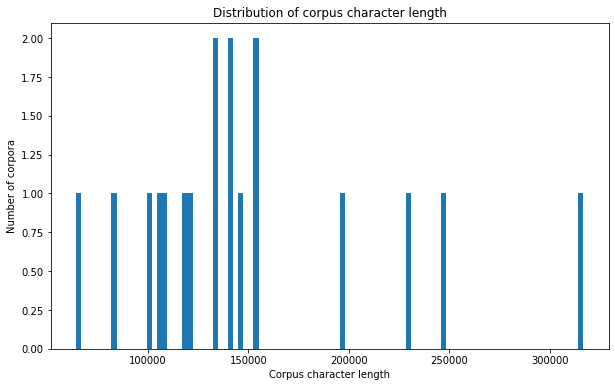

In [11]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.question_lemmatize_clean]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of corpus character length')
plt.ylabel('Number of corpora')
plt.xlabel('Corpus character length')
#sns.despine()
plt.show()

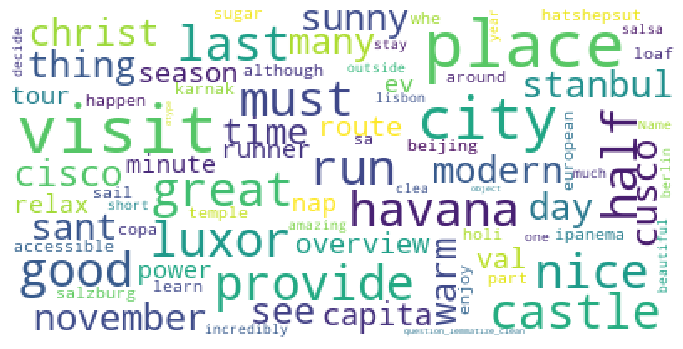

In [57]:

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_clean['question_lemmatize_clean']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [59]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_clean['question_lemmatize_clean'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [60]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english', max_df = 0.90).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_clean['question_lemmatize_clean'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [23]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_clean['question_lemmatize_clean'], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [24]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_clean['question_lemmatize_clean'], 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in the question text"))
fig.show()

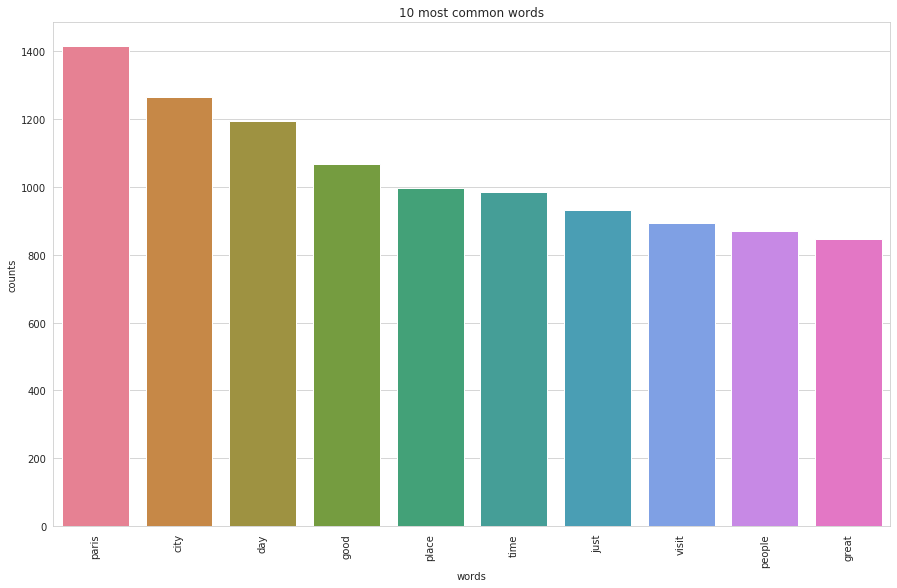

In [33]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
        
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_clean['question_lemmatize_clean'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [45]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 15
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
sydney city day great tour walk good harbour time place opera house ferry bus visit

Topic #1:
paris city day time good just place people visit hotel walk great istanbul trip like

Topic #2:
field daytrip leaf sanctuary thrilling destroy jungle dad carryon moneythe overseas higher achieve insect pacific

Topic #3:
cusco peru day trip place good city tour inca great time guide visit hotel picchu

Topic #4:
santorini island place view good beautiful stay fira day hotel visit beach just oia town


In [42]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'w') as f:
    pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

IndentationError: expected an indented block (<unknown>, line 8)

In [12]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
stopWords = ['phuket', 'santorini', 'cusco', 'sydney', 'istanbul', 'florence', 'cape', 'town', 'havana', 'jaipur', 'luxor', 'marrakech', 'rio', 'salzburg', "beijing", "st", "petersburg", 'edinburgh', 'lisbon', 'berlin', "capetown", "www", "lisboa"] + list(esw) 

In [17]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=1,                       
                             stop_words=stopWords,             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=5000, 
                             max_df = 0.50
                            )

data_vectorized = vectorizer.fit_transform(df_clean['question_lemmatize_clean'])


In [18]:
lda_model = LatentDirichletAllocation(n_components=15, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
8      114.344879  114.308296       1        1  27.967745
13     105.821045  -93.749626       2        1  18.738862
7     -138.334473   95.320763       3        1  15.143296
4       -7.436697  111.259697       4        1  10.798613
9     -207.550629 -105.472603       5        1   9.906303
12      52.817650   14.603765       6        1   8.492820
14     168.010849    6.806950       7        1   4.527273
5      -94.169601 -157.789551       8        1   4.405855
10    -122.849174  -39.059418       9        1   0.002748
11     -94.894264  195.408295      10        1   0.002748
6       24.927401 -180.464874      11        1   0.002748
3      -53.413467   26.832108      12        1   0.002748
2      -12.255850  -72.093201      13        1   0.002748
0     -224.217957   28.070581      14        1   0.002748
1       36.154255  209.427582      15        1   0.002748, topic_info=          Term        Freq       Total Category  logprob  loglift
2879    mosque  195.000000  195.000000  Default  30.0000  30.0000
4478    temple  249.000000  249.000000  Default  29.0000  29.0000
4671   turkish  172.000000  172.000000  Default  28.0000  28.0000
417     bazaar  148.000000  148.000000  Default  27.0000  27.0000
3029      nile  135.000000  135.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
845   circular    0.000360   40.483499  Topic15  -8.1113  -1.1282
4670    turkey    0.000385  118.418210  Topic15  -8.0432  -2.1335
4873       war    0.000356   36.473254  Topic15  -8.1234  -1.0360
2561      lira    0.000358   49.625702  Topic15  -8.1169  -1.3374
3915       san    0.000354   57.979407  Topic15  -8.1288  -1.5049

[961 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
10        2  0.243385    absence
10        5  0.243385    absence
10        6  0.243385    absence
19        3  0.901082  accademia
27        8  0.660204  acclimate
...     ...       ...        ...
4967      2  0.248554    wrought
4967      6  0.497107    wrought
4969      4  0.832015     wynard
4974      6  0.505301     yacout
4987      1  0.903637        ytl

[1265 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 14, 8, 5, 10, 13, 15, 6, 11, 12, 7, 4, 3, 1, 2])

In [51]:
lda_model = LatentDirichletAllocation(n_components=20, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
16     -10.878068   10.538728       1        1  29.556049
3      -60.884026  -75.591820       2        1  24.052440
19      -2.336119  -53.289074       3        1  13.833501
13     -61.385319  -12.914634       4        1  11.471333
18     -28.737743  126.296997       5        1  10.279587
4        1.066606 -123.552811       6        1   5.412362
1       45.140720   -7.947869       7        1   5.378714
17    -140.795975  -98.530548       8        1   0.001232
11      61.531681  -83.240562       9        1   0.001232
10     -72.563057 -140.396881      10        1   0.001232
7       15.984491   63.578186      11        1   0.001232
0     -160.851624   68.945145      12        1   0.001232
6       85.961830   51.922935      13        1   0.001232
14     -99.020836  109.936348      14        1   0.001232
12    -176.764130   -8.681684      15        1   0.001232
2     -117.189880  -37.420200      16        1   0.001232
5      108.829918  -22.946203      17        1   0.001232
15      47.588097  121.934814      18        1   0.001232
8     -106.467834   30.176889      19        1   0.001232
9      -50.613804   59.328842      20        1   0.001232, topic_info=     Term         Freq        Total Category  logprob  loglift
4    city  1255.000000  1255.000000  Default  30.0000  30.0000
5     day  1193.000000  1193.000000  Default  29.0000  29.0000
8    good  1061.000000  1061.000000  Default  28.0000  28.0000
29   time   980.000000   980.000000  Default  27.0000  27.0000
21  place   990.000000   990.000000  Default  26.0000  26.0000
..    ...          ...          ...      ...      ...      ...
12   just     0.007400   939.258916  Topic20  -3.7019  -0.4469
8    good     0.007447  1061.203264  Topic20  -3.6956  -0.5627
36  visit     0.007242   888.381993  Topic20  -3.7236  -0.4129
29   time     0.007188   980.382697  Topic20  -3.7310  -0.5188
10  hotel     0.007101   828.098977  Topic20  -3.7432  -0.3622

[745 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.308093  area
0         2  0.284594  area
0         3  0.135770  area
0         4  0.046997  area
0         5  0.130548  area
...     ...       ...   ...
39        3  0.081982   way
39        4  0.090391   way
39        5  0.113514   way
39        6  0.037838   way
39        7  0.050451   way

[278 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 4, 20, 14, 19, 5, 2, 18, 12, 11, 8, 1, 7, 15, 13, 3, 6, 16, 9, 10])

In [ ]:
def process(reviews):
    reviews1=positive_review_string(reviews)

    reviews1 = reviews1.lower()
    # collecting a list of stop words from nltk and punctuation form
    # string class and create single array.

    #corpus= [remove_punctuation(corpus) for t in corpus]
    reviews1= " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", reviews1).split())

    reviews1 = re.sub(r'[0-9]+', '', reviews1)
    #print(x2) 

    # remove stop words from string.
    stopset = [stopwords.words('english')]  
    # word_tokenize is used to tokenize the input reviews1 in word tokens.
    reviews1 = " ".join([i for i in word_tokenize(reviews1) if i not in stopset])

   
    return(reviews1)

In [ ]:
li = []

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/trial/istanbul.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:293]

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/trial/paris.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:471]

In [ ]:
li = []

for filename in all_filenames:
    df = pd.read_csv(filename, index_col=None, names=['stars', 'title', 'text', 'user', 'url'])
    if ("https://" in df['user'])==False:
        data=url.split("/")
        data2=data[-1]
        attraction_name='_'.join(data2)
        df['user_new'] = attraction_name        
        df.groupby(['stars', 'title'],as_index=False).agg(''.join)    
        #df.drop(['user_old'], axis=1)
        li.append(df)

In [ ]:
import pickle
with open('../data/cleaned/phuket.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(city_phuket, f)

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/trial/santorini.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:163]

In [ ]:
city_santorini=process(san)

In [ ]:
import pickle
with open('../data/cleaned/santorini.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(city_santorini, f)

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/trial/cusco.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:108]

In [ ]:
city_cusco=process(san)

In [ ]:
import pickle
with open('../data/cleaned/cusco.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(city_cusco, f)

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/trial/sydney.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:122]

In [ ]:
city_sydney=process(san)

In [ ]:
import pickle
with open('../data/cleaned/sydney.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(city_sydney, f)

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/trial/paris.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:471]

In [ ]:
city_paris=process(san)

In [ ]:
import pickle
with open('../data/cleaned/paris.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(city_paris, f)

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/trial/istanbul.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:293]

In [ ]:
city_istanbul=process(san)

In [ ]:
import pickle
with open('../data/cleaned/istanbul.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(city_istanbul, f)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

    
# creating vocabulary using uni-gram and bi-gram
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(x3)

feature_vectors = tfidf_vectorizer.transform(x3)

In [ ]:
print(feature_vectors)

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
#tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
#tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)
 

In [ ]:
# Load in the dataframe
mill = pd.read_csv("../data/raw/LAmill.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

In [ ]:
# Divide reviews into positive and negative based on the median grade for the dataset
median_stars = 35

mill.loc[mill['stars'] > median_stars, 'review_category'] = 'Positive' 

mill_pos = mill[mill['review_category'] == 'Positive']

mill_texts_pos = mill_pos['text'].tolist()

type(mill_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(mill_texts_pos)) 

#print(test)

mill1=pre_process(test)

x=stemSentence(mill1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

mwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

mill3 = collections.Counter(mwordList)

In [ ]:
# Dataframes for most frequent common words in positive and negative reviews
mill_common_pos = pd.DataFrame(mill3.most_common(15),
                             columns=['words', 'count'])


fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
mill_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
mill_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

In [ ]:
# initialize an empty string 
str1 = " " 
    
# return string   
mill_wordstring=(str1.join(mwordList)) 

#print(mill_wordstring)
#print(wordList)

In [ ]:
import pickle
with open('../data/cleaned/old_mill.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(mill_wordstring, f)

In [ ]:
# Load in the dataframe
jur = pd.read_csv("../data/raw/LAjur.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#jur.head

In [ ]:
median_stars = 35

jur.loc[jur['stars'] > median_stars, 'review_category'] = 'Positive' 

jur_pos = jur[jur['review_category'] == 'Positive']

jur_texts_pos = jur_pos['text'].tolist()

type(jur_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(jur_texts_pos)) 

#print(test)

jur1=pre_process(test)

x=stemSentence(jur1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

jwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

jur3 = collections.Counter(jwordList)

In [ ]:
# initialize an empty string 
str1 = " " 
    
# return string   
jur_wordstring=(str1.join(jwordList)) 

#print(mill_wordstring)
#print(wordList)

In [ ]:
import pickle
with open('../data/cleaned/mus_jurrasic_tech.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(jur_wordstring, f)

In [ ]:
# Load in the dataframe
mbr = pd.read_csv("../data/raw/LAmusrel.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#mbr.head

In [ ]:
median_stars = 35

mbr.loc[mbr['stars'] > median_stars, 'review_category'] = 'Positive' 

mbr_pos = mbr[mbr['review_category'] == 'Positive']

mbr_texts_pos = mbr_pos['text'].tolist()

type(mbr_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(mbr_texts_pos)) 

#print(test)

mbr1=pre_process(test)

x=stemSentence(mbr1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

mbrwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

mbr3 = collections.Counter(mbrwordList)

In [ ]:
# initialize an empty string 
str1 = " " 
    
# return string   
mbr_wordstring=(str1.join(mbrwordList)) 

#print(mill_wordstring)
#print(wordList)

In [ ]:
import pickle
with open('../data/cleaned/mus_brok_relationships.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(mbr_wordstring, f)

In [ ]:
# Load in the dataframe
bal = pd.read_csv("../data/raw/LAbalboa.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#jur.head

In [ ]:
median_stars = 35

bal.loc[bal['stars'] > median_stars, 'review_category'] = 'Positive' 

bal_pos = bal[bal['review_category'] == 'Positive']

bal_texts_pos = bal_pos['text'].tolist()

type(bal_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(bal_texts_pos)) 

#print(test)

bal1=pre_process(test)

x=stemSentence(bal1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

bwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

bal3 = collections.Counter(bwordList)

In [ ]:
# initialize an empty string 
str1 = " " 
    
# return string   
bal_wordstring=(str1.join(bwordList)) 

#print(mill_wordstring)
#print(wordList)

In [ ]:
import pickle
with open('../data/cleaned/balboa_island.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(bal_wordstring, f)

In [ ]:
# Load in the dataframe
tar = pd.read_csv("../data/raw/LAtarpit.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#jur.head

In [ ]:
median_stars = 35

tar.loc[tar['stars'] > median_stars, 'review_category'] = 'Positive' 

tar_pos = tar[tar['review_category'] == 'Positive']

tar_texts_pos = tar_pos['text'].tolist()

type(tar_texts_pos)

# initialize an empty string 
str1 = " " 
    
# return string   
test=(str1.join(tar_texts_pos)) 

#print(test)

tar1=pre_process(test)

x=stemSentence(tar1)
#print(x)

import re

x2 = re.sub(r'[0-9]+', '', x)
#print(x2)

bwordList = re.sub("[^\w]", " ",  x2).split()

#print(wordList)

tar3 = collections.Counter(bwordList)

In [ ]:
# initialize an empty string 
str1 = " " 
    
# return string   
tar_wordstring=(str1.join(bwordList)) 

#print(mill_wordstring)
#print(wordList)

In [ ]:
import pickle
with open('../data/cleaned/labrea_tarpit.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(tar_wordstring, f)

In [ ]:
type(city_santorini)

In [ ]:
reviews=[city_phuket, city_santorini, city_paris, city_istanbul, city_sydney, city_cusco, mbr_wordstring, bal_wordstring, jur_wordstring, mill_wordstring, tar_wordstring]

In [ ]:
import pickle
with open('../data/cleaned/old_mill.pkl', 'rb') as f:    #../../../ each ../ goes up one folder level
    mill = pickle.load(f)

import pickle
with open('../data/cleaned/mus_jurrasic_tech.pkl', 'rb') as f:    #../../../ each ../ goes up one folder level
    mjt = pickle.load(f)

import pickle
with open('../data/cleaned/mus_brok_relationships.pkl', 'rb') as f:    #../../../ each ../ goes up one folder level
    mbr = pickle.load(f)

import pickle
with open('../data/cleaned/balboa_island.pkl', 'rb') as f:    #../../../ each ../ goes up one folder level
    balboa = pickle.load(f)

import pickle
with open('../data/cleaned/labrea_tarpit.pkl', 'rb') as f:    #../../../ each ../ goes up one folder level
    labrea = pickle.load(f)

LAreviews=[mill, mjt, mbr, balboa, labrea]

import pickle
with open('../data/cleaned/LAreviews.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(LAreviews, f)

In [ ]:
#print(reviews)

In [ ]:
#https://stackoverflow.com/questions/12118720/python-tf-idf-cosine-to-find-document-similarity
tfidf = TfidfVectorizer().fit_transform(reviews)
tfidf

In [ ]:
#tfidf[0:1]

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[0:1], tfidf).flatten()
cosine_similarities

In [ ]:
#phuket most similar to balboa island

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[1:2], tfidf).flatten()
cosine_similarities

In [ ]:
#santorini most similar to istanbul. from LA, most similar to balboa

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[2:3], tfidf).flatten()
cosine_similarities

In [ ]:
#paris most similar to museum of jurrasic technology

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[4:5], tfidf).flatten()
cosine_similarities

In [ ]:
#istanbul most similar to balboa island

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[5:6], tfidf).flatten()
cosine_similarities

In [ ]:
#cusco most similar to museum of jurrasic technology

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

    
# creating vocabulary using uni-gram and bi-gram
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(reviews)

feature_vectors = tfidf_vectorizer.transform(reviews)

#print(feature_vectors)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(reviews)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[1]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[2]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[3]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[4]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[5]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[6]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
https://stackoverflow.com/questions/12118720/python-tf-idf-cosine-to-find-document-similarity

In [ ]:
https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XtXAERZlBEJ

In [ ]:
https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

In [ ]:
https://medium.com/@Intellica.AI/comparison-of-different-word-embeddings-on-text-similarity-a-use-case-in-nlp-e83e08469c1c

In [ ]:
https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [ ]:
# Load in the dataframe
san1 = pd.read_csv("../data/raw/santorini.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

#remove reviews that are not in english
san=san1[0:163]

san.head

In [ ]:
median_stars = 35

san.loc[san['stars'] > median_stars, 'review_category'] = 'Positive' 

san_pos = san[san['review_category'] == 'Positive']

san_texts_pos = san_pos['text'].tolist()

san_clean_texts_pos = clean_text(san_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
san_common_pos = pd.DataFrame(san_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
san_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

In [ ]:
# Get an entropy shift
entropy_shift = rs.EntropyShift(reference=san_clean_texts_pos,
                                comparison=phu_clean_texts_pos,
                                base=2)
entropy_shift.get_shift_graph() 

In [ ]:
# Get a Jensen-Shannon divergence shift
#The Jensen-Shannon divergence symmetrizes the Kullback-Leibler divergence by measuring the 
#average divergence of each text from another text representing their average. 
#The measure is symmetric, meaning there is no order in how the texts are specified.
from shifterator import symmetric_shift as ss
jsd_shift = ss.JSDivergenceShift(system_1=san_clean_texts_pos,
                                 system_2=phu_clean_texts_pos,
                                 base=2)
jsd_shift.get_shift_graph()

In [ ]:
# Load in the dataframe
jur = pd.read_csv("../data/raw/LAjur.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

jur.head

In [ ]:
median_stars = 35

jur.loc[jur['stars'] > median_stars, 'review_category'] = 'Positive' 

jur_pos = jur[jur['review_category'] == 'Positive']

jur_texts_pos = jur_pos['text'].tolist()

jur_clean_texts_pos = clean_text(jur_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
jur_common_pos = pd.DataFrame(jur_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [ ]:
# Load in the dataframe
mbr = pd.read_csv("../data/raw/LAmusrel.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#mbr.head

In [ ]:
median_stars = 35

mbr.loc[mbr['stars'] > median_stars, 'review_category'] = 'Positive' 

mbr_pos = mbr[mbr['review_category'] == 'Positive']

mbr_texts_pos = mbr_pos['text'].tolist()

mbr_clean_texts_pos = clean_text(mbr_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
mbr_common_pos = pd.DataFrame(mbr_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [ ]:
# Load in the dataframe
mill = pd.read_csv("../data/raw/LAmill.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#mbr.head

In [ ]:
median_stars = 35

mill.loc[mill['stars'] > median_stars, 'review_category'] = 'Positive' 

mill_pos = mill[mill['review_category'] == 'Positive']

mill_texts_pos = mill_pos['text'].tolist()


In [ ]:
pip install unidecode

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode

In [ ]:
corpus= mill_texts_pos

#import stringdef pre_process(corpus):
    # convert input corpus to lower case.
corpus = corpus.lower()

In [ ]:

    # collecting a list of stop words from nltk and punctuation form
    # string class and create single array.
    stopset = stopwords.words('english') + list(string.punctuation)
    # remove stop words and punctuations from string.
    # word_tokenize is used to tokenize the input corpus in word tokens.
   corpus = " ".join([i for i in word_tokenize(corpus) if i not in stopset])
    # remove non-ascii characters
    corpus = unidecode(corpus)
    return corpuspre_process("Sample of non ASCII: Ceñía. How to remove stopwords and punctuations?")

In [ ]:


mill_clean_texts_pos = clean_text(mill_texts_pos)

In [ ]:
print(mill_clean_texts_pos)

In [ ]:
#from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
mill_final= stemmer.stem(mill_clean_texts_pos)

In [ ]:

print(stemmer.stem("Blessing"))
bless


lemmatizer = WordNetLemmatizer()
sentence = "The striped bats are hanging on their feet for best"
words = word_tokenize(sentence)for w in words:
    print(w, " : ", lemmatizer.lemmatize(w)

In [ ]:

# Dataframes for most frequent common words in positive and negative reviews
mill_common_pos = pd.DataFrame(mill_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [ ]:
# Load in the dataframe
jur = pd.read_csv("../data/raw/LAjur.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

jur.head

In [ ]:
median_stars = 35

jur.loc[jur['stars'] > median_stars, 'review_category'] = 'Positive' 

jur_pos = jur[jur['review_category'] == 'Positive']

jur_texts_pos = jur_pos['text'].tolist()

jur_clean_texts_pos = clean_text(jur_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
jur_common_pos = pd.DataFrame(jur_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [ ]:
# Load in the dataframe
mbr = pd.read_csv("../data/raw/LAmusrel.csv", names=['stars', 'title', 'text', 'username'])
#../../../ each ../ goes up one folder level

#mbr.head

In [ ]:
median_stars = 35

mbr.loc[mbr['stars'] > median_stars, 'review_category'] = 'Positive' 

mbr_pos = mbr[mbr['review_category'] == 'Positive']

mbr_texts_pos = mbr_pos['text'].tolist()

mbr_clean_texts_pos = clean_text(mbr_texts_pos)

# Dataframes for most frequent common words in positive and negative reviews
mbr_common_pos = pd.DataFrame(mbr_clean_texts_pos.most_common(15),
                             columns=['words', 'count'])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
jur_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
mbr_common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

In [ ]:
# Get an entropy shift
entropy_shift = rs.EntropyShift(reference=jur_clean_texts_pos,
                                comparison=mbr_clean_texts_pos,
                                base=2)
entropy_shift.get_shift_graph() 


In [ ]:
# Get a Jensen-Shannon divergence shift
#The Jensen-Shannon divergence symmetrizes the Kullback-Leibler divergence by measuring the 
#average divergence of each text from another text representing their average. 
#The measure is symmetric, meaning there is no order in how the texts are specified.
from shifterator import symmetric_shift as ss
jsd_shift = ss.JSDivergenceShift(system_1=jur_clean_texts_pos,
                                 system_2=mbr_clean_texts_pos,
                                 base=2)
jsd_shift.get_shift_graph()